import 할 내용들 

In [29]:
from keras import layers
from keras import models 

<모델 만들기> 

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [32]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [35]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(path+"train_dir",target_size=(150, 150),batch_size=20,class_mode='binary') # 이진 레이블, 2개 폴더-cats, dogs
validation_generator = test_datagen.flow_from_directory(path+"validation_dir",target_size=(150, 150),batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [38]:
history = model.fit_generator(train_generator, # 20
steps_per_epoch=100, # 20 batches*100 steps=2000 
epochs=30, 
validation_data=validation_generator,
validation_steps=50) # 20 batches * 50 steps=1000 

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 90s 882ms/step - loss: 0.6986 - acc: 0.5019 - val_loss: 0.6786 - val_acc: 0.6350
Epoch 2/30
100/100 [==============================] - 88s 882ms/step - loss: 0.6671 - acc: 0.6058 - val_loss: 0.6431 - val_acc: 0.6390
Epoch 3/30
100/100 [==============================] - 87s 866ms/step - loss: 0.6082 - acc: 0.6649 - val_loss: 0.6196 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 79s 789ms/step - loss: 0.5847 - acc: 0.6818 - val_loss: 0.5896 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 77s 771ms/step - loss: 0.5360 - acc: 0.7176 - val_loss: 0.5849 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 77s 770ms/step - loss: 0.4974 - acc: 0.7763 - val_loss: 0.5631 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 77s 773ms/step - loss: 0.4792 - acc: 0.7773 - val_loss: 0.6485 - val_acc: 0.6630
Epoch 8/30
100/100 [==============================] - 8

In [39]:
model.save('cats_and_dogs_small_1.h5')

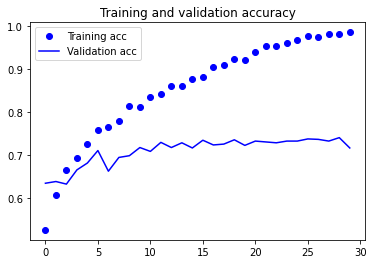

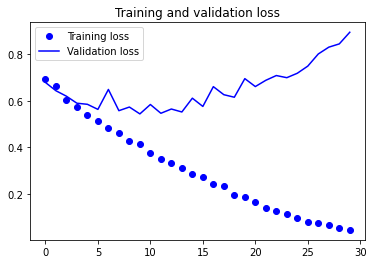

In [41]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


<!--아래 3개는 실행 x - 디렉토리 직접 만듬>>

In [1]:
import os, shutil


In [ ]:
original_dataset_dir = './dogs-vs-cats/train' # 원본 데이터셋
base_dir = './datasets/cats_and_dogs_small' # 소규모 데이터셋
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train') # 훈련, 검증, 테스트 분할
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats') # 훈련용 고양이
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') # 훈련용 강아지
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') # 검증용 고양이
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 검증용 강아지
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats') # 테스트용 고양이
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') # 테스트용 강아지
os.mkdir(test_dogs_dir)

In [ ]:
names=['cat.{}.jpg'.format(i) for i in range(1000)] 
# 처음 1,000개의 고양이 이미지
for fname in fnames:
src = os.path.join(original_dataset_dir, fname)
dst = os.path.join(train_cats_dir, fname)
shutil.copyfile(src, dst) # train_cats_dir에 복사
fnames=['cat.{}.jpg'.format(i) for i in range(1000, 1500)]#다음 500개 고양이 이미지
for fname in fnames:
src = os.path.join(original_dataset_dir, fname)
dst = os.path.join(validation_cats_dir, fname)
shutil.copyfile(src, dst) # validation_cats_dir에 복사
fnames=['cat.{}.jpg'.format(i) for i in range(1500, 2000)] #다음 500개 고양이 이미지
for fname in fnames:
src = os.path.join(original_dataset_dir, fname)
dst = os.path.join(test_cats_dir, fname)
shutil.copyfile(src, dst) # test_cats_dir에 복사

<!-- 위에는 안해도됌 -->


In [26]:
path = "./dogs-vs-cats/small/"
print("cats 학습 데이터 량 : ",len(os.listdir(path+"train_dir/train_cats_dir")))
print("dogs 학습 데이터 량 : ",len(os.listdir(path+"train_dir/train_dogs_dir")))
print("cats 검증 데이터 량 : ",len(os.listdir(path+"validation_dir/validation_cats_dir")))
print("dogs 검증 데이터 량 : ",len(os.listdir(path+"validation_dir/validation_dogs_dir")))
print("cats 테스트 데이터 량 : ",len(os.listdir(path+"test_dir/test_cats_dir")))
print("dogs 테스트 데이터 량 : ",len(os.listdir(path+"test_dir/test_dogs_dir")))

cats 학습 데이터 량 :  1000
dogs 학습 데이터 량 :  1000
cats 검증 데이터 량 :  500
dogs 검증 데이터 량 :  500
cats 테스트 데이터 량 :  500
dogs 테스트 데이터 량 :  500


# 새로운 모델 제작

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 256)      

In [55]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['acc'])
history2 = model.fit_generator(train_generator,
steps_per_epoch=100,
epochs=30, 
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 55s 540ms/step - loss: 0.5508 - acc: 0.7146 - val_loss: 0.5687 - val_acc: 0.6960
Epoch 2/30
100/100 [==============================] - 53s 530ms/step - loss: 0.5079 - acc: 0.7425 - val_loss: 0.5568 - val_acc: 0.7280
Epoch 3/30
100/100 [==============================] - 55s 550ms/step - loss: 0.4324 - acc: 0.7967 - val_loss: 0.6062 - val_acc: 0.7040
Epoch 4/30
100/100 [==============================] - 53s 532ms/step - loss: 0.3519 - acc: 0.8325 - val_loss: 0.6161 - val_acc: 0.7210
Epoch 5/30
100/100 [==============================] - 53s 533ms/step - loss: 0.2795 - acc: 0.8734 - val_loss: 0.8456 - val_acc: 0.7240
Epoch 6/30
100/100 [==============================] - 53s 533ms/step - loss: 0.1489 - acc: 0.9378 - val_loss: 0.9615 - val_acc: 0.7290
Epoch 7/30
100/100 [==============================] - 53s 533ms/step - loss: 0.1009 - acc: 0.9640 - val_loss: 1.0817 - val_acc: 0.7390
Epoch 8/30
100/100 [==============================] - 5

In [56]:
model.save('cats_and_dogs_small_3.h5')

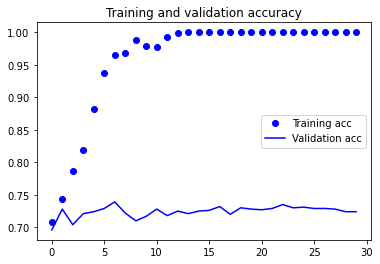

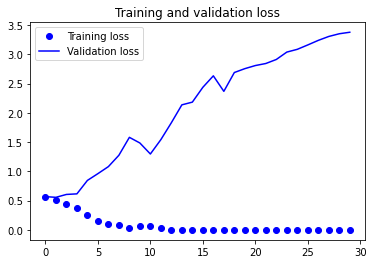

In [57]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [60]:
model.evaluate(validation_generator)

50/50 [==============================] - 6s 113ms/step - loss: 3.3776 - acc: 0.7240


[3.377608299255371, 0.7239999771118164]

In [67]:
model1 = kloadLayersModel('cats_and_dogs_small_1.h5')

AttributeError: module 'tensorflow' has no attribute 'loadLayersModel'

In [68]:
from tensorflow import keras 
model = keras.models.load_model('cats_and_dogs_small_1.h5')

In [69]:
model.evaluate(validation_generator)

50/50 [==============================] - 7s 141ms/step - loss: 0.8939 - acc: 0.7170


[0.8938881158828735, 0.7170000076293945]

210512

In [1]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 256)      

In [4]:
img_path = './dogs-vs-cats/small/test_dir/test_cats_dir/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


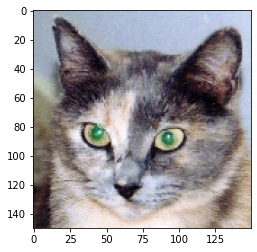

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [6]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


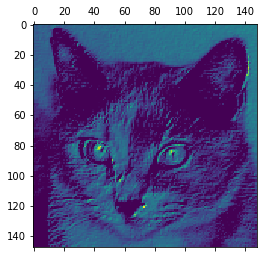

In [16]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()


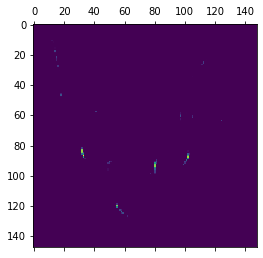

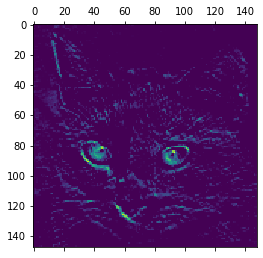

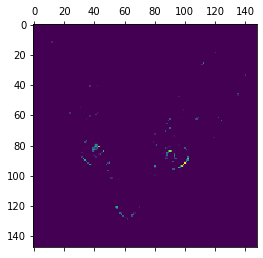

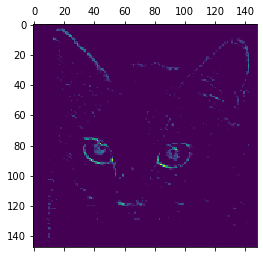

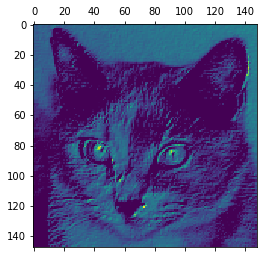

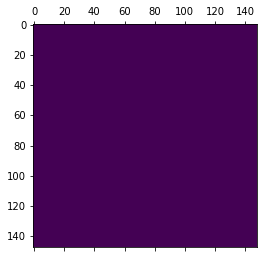

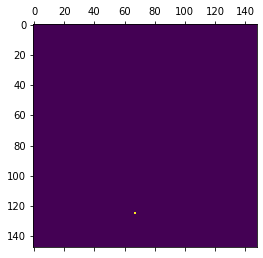

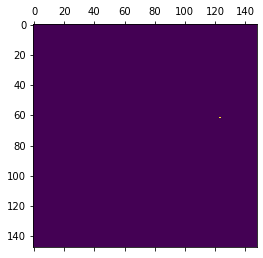

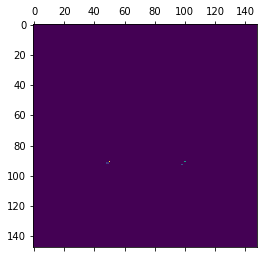

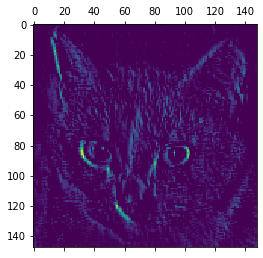

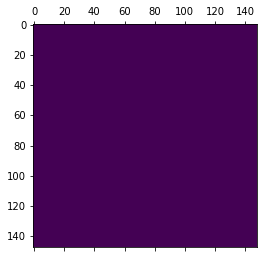

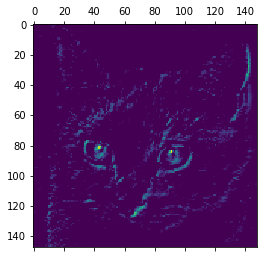

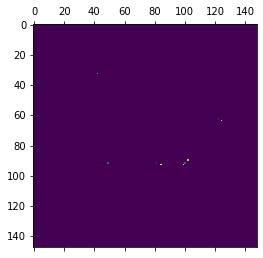

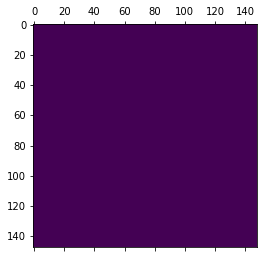

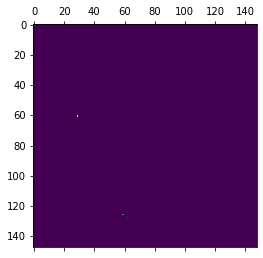

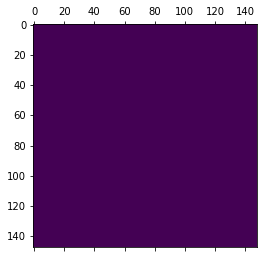

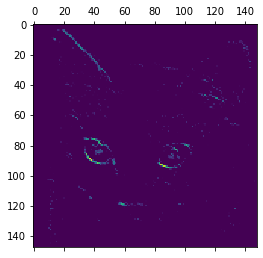

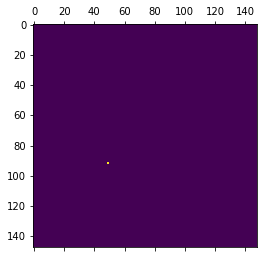

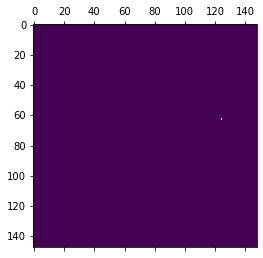

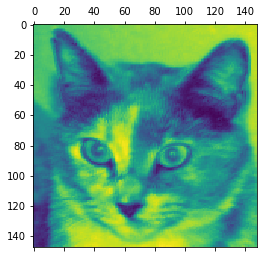

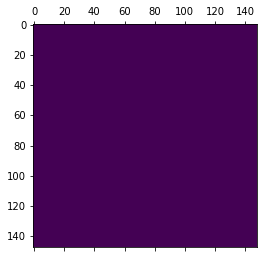

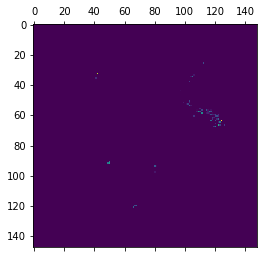

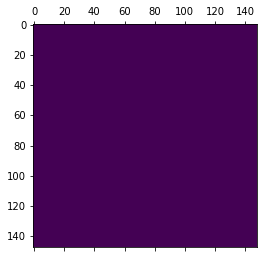

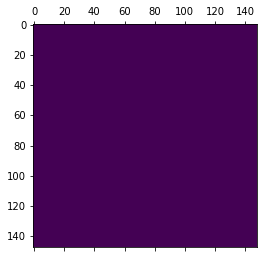

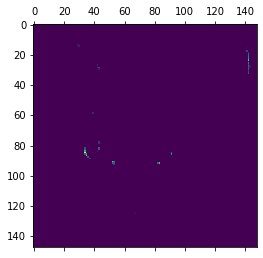

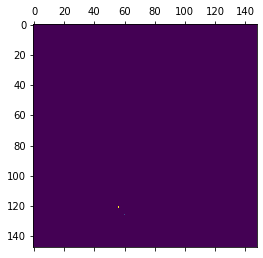

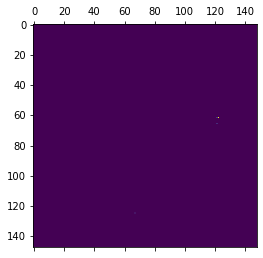

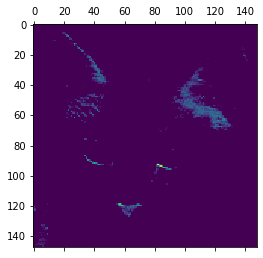

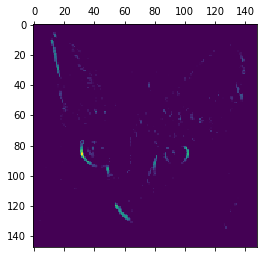

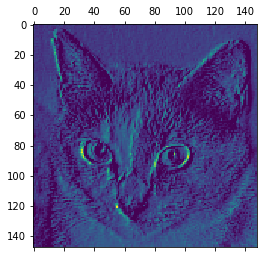

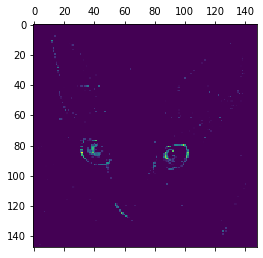

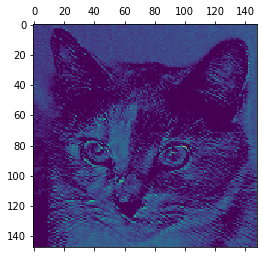

In [22]:
for i in range(32):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.show()

# 데이터증식 사용

In [2]:
#다시 import 해야하는 것
from keras import models
from keras.preprocessing import image
import numpy as np
from tensorflow import keras 
from keras import layers
from keras.preprocessing.image import ImageDataGenerator



In [3]:
datagen = ImageDataGenerator(
rotation_range = 20,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
fill_mode = 'nearest')

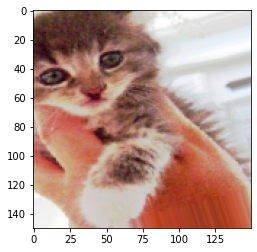

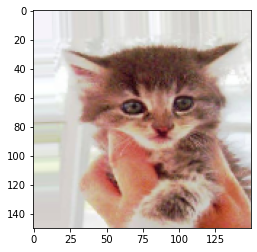

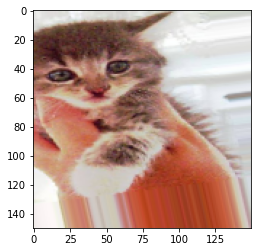

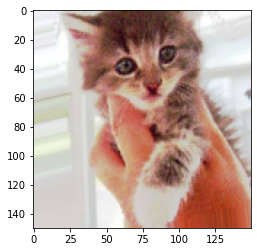

In [23]:
import os, shutil
import matplotlib.pyplot as plt
import numpy
path = "./dogs-vs-cats/small/train_dir/train_cats_dir"
#fnames = sorted([os.path.join(path, fname) for fname in os.listdir(path)])
fnames = [path + "/" +fname for fname in os.listdir(path)]


img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150,3))
# (150, 150, 3) 크기의 넘파이 배열로 변환합니다

x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape(1,150,150,3)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [28]:
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./dogs-vs-cats/small/train_dir"
validation_dir = "./dogs-vs-cats/small/validation_dir"
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 65s 648ms/step - loss: 0.6825 - acc: 0.5675 - val_loss: 0.6928 - val_acc: 0.5110
Epoch 2/100
100/100 [==============================] - 66s 664ms/step - loss: 0.6677 - acc: 0.5855 - val_loss: 0.6495 - val_acc: 0.6190
Epoch 3/100
100/100 [==============================] - 66s 656ms/step - loss: 0.6617 - acc: 0.6120 - val_loss: 0.7104 - val_acc: 0.5200
Epoch 4/100
100/100 [==============================] - 60s 596ms/step - loss: 0.6520 - acc: 0.6255 - val_loss: 0.6470 - val_acc: 0.6350
Epoch 5/100
100/100 [==============================] - 58s 579ms/step - loss: 0.6371 - acc: 0.6400 - val_loss: 0.5955 - val_acc: 0.6680
Epoch 6/100
 47/100 [=============>................] - ETA: 28s - loss: 0.6356 - acc: 0.6426

KeyboardInterrupt: 

In [ ]:
model.save('cats_and_dogs_small_증식데이터사용.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11311873724735206649]

NameError: name 'nvidia' is not defined